___
**Brief content:**

1. Import spreadsheet with well logs.
2. Clean, if needed.
3. Split data by features and label.
4. Preprocess.
5. Write more.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
link = '/home/alex/Projects/ML_V5/data/well_logs.csv'
well_logs = pd.read_csv(link)
well_logs

,Well,MD,GR,DTCO,P34H,P40H,TNPH,ROBB
0,V5,2212.0,116.6058,-9999.0,-9999.0000,-9999.0,-9999.000,-9999.0000
1,V5,2212.1,116.6058,-9999.0,-9999.0000,-9999.0,-9999.000,-9999.0000
2,V5,2212.2,116.6058,-9999.0,-9999.0000,-9999.0,-9999.000,-9999.0000
3,V5,2212.3,116.6058,-9999.0,-9999.0000,-9999.0,-9999.000,-9999.0000
4,V5,2212.4,116.6058,-9999.0,-9999.0000,-9999.0,-9999.000,-9999.0000
...,...,...,...,...,...,...,...,...
38865,V5,6098.5,31.4931,-9999.0,63.5947,-9999.0,0.019,2.5898
38866,V5,6098.6,32.3285,-9999.0,60.2672,-9999.0,0.019,2.5898
38867,V5,6098.7,32.1275,-9999.0,59.8000,-9999.0,0.019,2.5898
38868,V5,6098.8,31.3013,-9999.0,62.6509,-9999.0,0.019,2.5898


___
**STEP (optional). Data cleaning/scrubbling.**

1. I did this, since my CSV was not ready to be used from-out-the-box. The issues were:
* redundant column 'P40H';
* empty values represented as '-9999';
* abnormaly high or low values that existed due to the technical imperfections of the tools, which where measuring those data.

Should your data be completely ready for the ML, just skip this step.

In [3]:
well_logs = well_logs.drop(columns=['P40H'])

#well_logs.dropna(inplace=True)

nan = float('NaN')

well_logs = well_logs.where(well_logs != -9999.0, nan)
well_logs = well_logs.where(well_logs.GR < 300, nan)
well_logs = well_logs.where(well_logs.GR > 0, nan)

well_logs['DTCO'] = well_logs['DTCO'].where(well_logs.DTCO > 0, nan)
well_logs['P34H'] = well_logs['P34H'].where(well_logs.P34H > 0, nan)
well_logs['ROBB'] = well_logs['ROBB'].where(well_logs.ROBB > 2, nan)

well_logs.dropna(inplace=True)

well_logs = well_logs.where(well_logs.MD > 4900)

well_logs

,Well,MD,GR,DTCO,P34H,TNPH,ROBB
30131,V5,5225.1,78.7471,64.8083,454.2552,0.3015,2.3105
30132,V5,5225.2,77.4200,66.3963,272.1593,0.3070,2.2702
30133,V5,5225.3,77.6156,67.8902,78.2537,0.3044,2.2648
30134,V5,5225.4,77.9235,68.8403,16.0384,0.2984,2.2750
30135,V5,5225.5,78.7067,69.4061,12.1635,0.2901,2.2936
...,...,...,...,...,...,...,...
38797,V5,6091.7,27.2271,51.4696,83.1672,0.0190,2.5898
38798,V5,6091.8,28.6153,51.6940,83.8461,0.0190,2.5898
38799,V5,6091.9,29.5789,51.8725,85.3581,0.0190,2.5898
38800,V5,6092.0,30.0094,52.0260,81.5647,0.0190,2.5898


___
**STEP. Split data by features (X) and label (y)**

1. That's a neccessary step to separate our features from the label.
2. By dropping 'Well', 'MD', and 'ROBB' columns, we leave only usable features as `X`.
3. Then we do indicate that our label column is 'ROBB' as `y`.
4. `shape` shows, oh what a surprise, an actual size of the datasets. An amount of raws should be alsways similar for both features and label.

References:
* One might experience some issues with the differences in shapes of the features and lable, try the following link in this case (cannot find the better one at the moment) - https://stackoverflow.com/questions/32034237/how-does-numpys-transpose-method-permute-the-axes-of-an-array

In [4]:
X = np.array(well_logs.drop(columns=['Well', 'MD', 'ROBB']))
y = np.array(well_logs['ROBB'])

X.shape, y.shape

((8654, 4), (8654,))

___
**STEP. Preprocessing**

1. Scaling is a standardization of a dataset along any axis, which in this case is 'y' axis. In other words, the sklearn.preprocessing.scale() algorithm puts out data on one scale from '-1' to '1'. Actually, that is not a 'must have' step, moreover, should you work with huge datasets, the time of computing will be highly incresed.

References:
* https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html
* https://stackoverflow.com/questions/42325212/what-preprocessing-scale-do-how-does-it-work

In [5]:
from sklearn import preprocessing

X = preprocessing.scale(X)

X

array([[ 0.51968461,  0.05909399,  7.51741869,  0.72929177],
       [ 0.48419707,  0.18711832,  4.26964497,  0.76593909],
       [ 0.48942755,  0.30755632,  0.81123919,  0.7486149 ],
       ...,
       [-0.795106  , -0.98378836,  0.93794981, -1.15304828],
       [-0.78359414, -0.97141321,  0.87029258, -1.15304828],
       [-0.78528415, -0.9594976 ,  0.75218046, -1.15304828]])

___
**STEP. 

In [6]:
from sklearn import model_selection
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.80)

clf = LinearRegression()
clf.fit(X_train, y_train)
accuracy_LR = clf.score(X_test, y_test)

accuracy_LR

0.18908427883204681

In [7]:
pred_lin_reg = clf.predict(X)
well_logs['pred_lin_reg'] = pred_lin_reg

pred_lin_reg

array([2.54964785, 2.55321839, 2.56231609, ..., 2.59761858, 2.59789376,
       2.59750038])

Text(0.5,0.94,'SOURCE DATA')

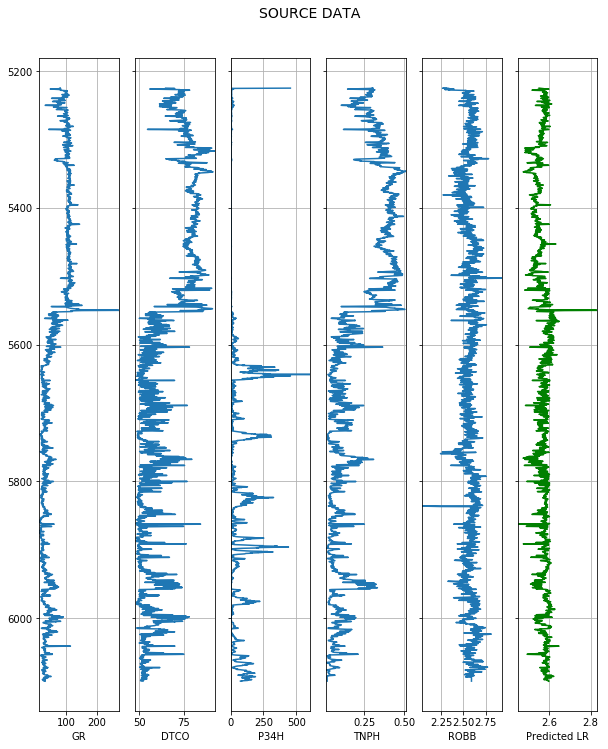

In [8]:
fig, ax = plt.subplots(nrows=1, ncols=6, sharey=True, figsize=(10, 12))

ax[0].invert_yaxis()
for elem in ax:
    elem.grid()
    
ax[0].set_xlabel('GR')
ax[0].plot(well_logs.GR, well_logs.MD)
ax[0].set_xlim(well_logs.GR.min(),well_logs.GR.max())

ax[1].set_xlabel('DTCO')
ax[1].plot(well_logs.DTCO, well_logs.MD)
ax[1].set_xlim(well_logs.DTCO.min(),well_logs.DTCO.max())

ax[2].set_xlabel('P34H')
ax[2].plot(well_logs.P34H, well_logs.MD)
ax[2].set_xlim(well_logs.P34H.min(),well_logs.P34H.max())

ax[3].set_xlabel('TNPH')
ax[3].plot(well_logs.TNPH, well_logs.MD)
ax[3].set_xlim(well_logs.TNPH.min(),well_logs.TNPH.max())

ax[4].set_xlabel('ROBB')
ax[4].plot(well_logs.ROBB, well_logs.MD)
ax[4].set_xlim(well_logs.ROBB.min(),well_logs.ROBB.max())

ax[5].set_xlabel('Predicted LR')
ax[5].plot(well_logs.pred_lin_reg, well_logs.MD, '-g')
ax[5].set_xlim(well_logs.pred_lin_reg.min(),well_logs.pred_lin_reg.max())

fig.suptitle('SOURCE DATA', fontsize=14,y=0.94)